# Doc To Vec To K-Means

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Combining all the spam and Non spam into single dataframe

In [ ]:
import pickle
import pandas as pd
import numpy
import re
import os
import glob
import numpy as np
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec

In [ ]:
spam_path = "/content/drive/MyDrive/Projects/Thuiraj/clean_spam/"

files = os.path.join("/content/drive/MyDrive/Projects/Thuiraj/clean_spam/", "*.csv")

files = glob.glob(files)


df_spam = pd.concat(map(pd.read_csv, files), ignore_index=True)




In [ ]:
# type(df_spam)

labels_spam = []

for i in range(len(df_spam.index)):
  labels_spam.append(0)

# labels_spam = pd.Series(labels_spam)
# labels_spam

In [ ]:
# len(df_spam.index)
df_spam = df_spam.assign(labels=labels_spam)

# df_spam['0']



In [ ]:
df_spam

,Unnamed: 0,0,labels
0,0,Your social security number has been suspended...,0
1,1,"Hello, is this Bob Smith?",0
2,2,Hi. I’m a representative of the Social Securit...,0
3,3,"Hello Mr/Mrs. X, my name is Y and I work with ...",0
4,4,I'm speaking from the Department of Homeland S...,0
...,...,...,...
195,70,I can give you all the information that you ne...,0
196,71,"The truth, Mrs. Johnson, is that CDs are for s...",0
197,72,Is Our information very clear? I can say lots ...,0
198,73,Our information is very clear or not. I have p...,0


In [ ]:
non_spam_path = "/content/drive/MyDrive/Projects/Thuiraj/clean_non_spam/"

files = os.path.join("/content/drive/MyDrive/Projects/Thuiraj/clean_non_spam/", "*.csv")

files = glob.glob(files)

df_non_spam = pd.concat(map(pd.read_csv, files), ignore_index=True)


In [ ]:
df_non_spam = df_non_spam[:200]

df_non_spam

,Unnamed: 0,0
0,0,solar
1,1,mm
2,2,
3,3,lipsmack anyway
4,4,xxx
...,...,...
195,195,lipsmack breath
196,196,so I will be picking you up November first
197,197,oh okay xxx
198,198,Three twenty five


In [ ]:

labels_non_spam = []

for i in range(len(df_non_spam.index)):
  labels_non_spam.append(1)


In [ ]:
df_non_spam = df_non_spam.assign(labels=labels_non_spam)


In [ ]:
df_non_spam

,Unnamed: 0,0,labels
0,0,solar,1
1,1,mm,1
2,2,,1
3,3,lipsmack anyway,1
4,4,xxx,1
...,...,...,...
195,195,lipsmack breath,1
196,196,so I will be picking you up November first,1
197,197,oh okay xxx,1
198,198,Three twenty five,1


In [ ]:
final_df = pd.concat([df_spam, df_non_spam], axis=0)

final_df = final_df[['0','labels']]

final_df = final_df.dropna()

In [ ]:
final_df

,0,labels
0,Your social security number has been suspended...,0
1,"Hello, is this Bob Smith?",0
2,Hi. I’m a representative of the Social Securit...,0
3,"Hello Mr/Mrs. X, my name is Y and I work with ...",0
4,I'm speaking from the Department of Homeland S...,0
...,...,...
195,lipsmack breath,1
196,so I will be picking you up November first,1
197,oh okay xxx,1
198,Three twenty five,1


## Doc To Vec

In [ ]:
from sklearn.model_selection import train_test_split

y = final_df.pop('labels')
X = final_df


X_train,X_test,y_train,y_test = train_test_split(X['0'],y,test_size=0.2, random_state=200, shuffle=True)



In [ ]:
y_test

124    0
183    1
95     1
4      1
180    1
      ..
169    1
68     0
147    1
139    1
111    1
Name: labels, Length: 80, dtype: int64

In [ ]:
final_df.to_csv('final_data.csv')

In [ ]:
final_df

,0
0,Your social security number has been suspended...
1,"Hello, is this Bob Smith?"
2,Hi. I’m a representative of the Social Securit...
3,"Hello Mr/Mrs. X, my name is Y and I work with ..."
4,I'm speaking from the Department of Homeland S...
...,...
195,lipsmack breath
196,so I will be picking you up November first
197,oh okay xxx
198,Three twenty five


# For Train Documents

In [ ]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
embeddings = []

for i in X_train:
  print(i)
  embeddings.append(np.array(embed([i])))
  
  # if(len(i[0]) > 0):
  #   print(i[0])
  #   embeddings.append(embed(i[0]))
  # else:
  #   embeddings.append(embed([" "]))

embeddings = np.array(embeddings)
# embeddings = embed(train_documents[0][0])

Please listen closely. You are being notified that your bank accounts and tax returns are being suspended. To review your rights and to avoid further action, please call out fir at 1844898XXX or press 1 to speak to your case manager immediately. 
Do you want more information about it?
I'm speaking from the Department of Homeland Security.  You have received this call because we have found suspicious activity related to your social security number and we have temporarily suspended your account. The moment you get this call kindly reach back to me on 1-888-952-5554. I repeat, 1-888-952-5554. When you do call us, provide us with the last 4 digits of your Social Security number so that we can better assist you with this issue. If we do not receive a call from you by this Sunday your bank account will be put on hold. 
 lipsmack anyway 
 You know 
You don’t have to know anything about it. Just like you don’t need to know how to build a car to invest in General Motors. Leave that to us while 

In [ ]:
print(len(embeddings))
print(len(X_train))

320
320


In [ ]:
new = embeddings.reshape(320, 512)

new_train = pd.DataFrame(new)

new_train

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.039837,-0.010541,-0.016211,0.054351,0.031477,0.032496,0.014613,0.018929,-0.063307,-0.087040,...,0.032975,-0.073449,0.062201,0.022938,-0.038340,-0.015816,0.051935,0.072725,-0.057005,-0.005310
1,-0.007720,0.023204,0.055351,-0.006997,-0.030600,-0.069320,-0.005369,-0.006204,0.045398,-0.053918,...,0.057787,0.033529,-0.072368,0.002459,0.010241,0.023242,-0.030583,-0.061270,-0.023944,-0.028162
2,-0.074932,-0.050772,0.009747,0.040975,0.018383,0.054667,0.068974,0.029469,0.054036,-0.081279,...,-0.018236,-0.074462,-0.040124,-0.037207,-0.026732,0.017459,-0.028920,0.058028,-0.009689,-0.001445
3,0.026922,-0.051575,0.052205,-0.045798,0.092076,-0.026029,0.001943,-0.064250,0.029887,0.046553,...,-0.005558,-0.129830,-0.034891,0.040593,-0.003925,-0.022483,0.010162,-0.010638,-0.002877,-0.073726
4,0.035849,-0.021559,0.025904,-0.007559,-0.011077,-0.035027,0.032599,-0.034943,-0.023618,0.022713,...,-0.079626,-0.114956,-0.000073,0.017590,0.003925,-0.005698,-0.043295,-0.063066,-0.048276,0.035166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.024968,0.066121,-0.038731,-0.026719,-0.022829,-0.035720,-0.020768,-0.078924,-0.026053,0.057902,...,-0.001598,0.001818,-0.048789,-0.000769,-0.004461,0.028221,0.005140,0.007655,-0.010167,0.003038
316,-0.018781,0.036324,-0.046709,-0.020300,-0.003496,-0.066261,0.006697,-0.046827,-0.053843,-0.011487,...,-0.003328,0.086414,0.055206,-0.075250,0.014603,-0.062668,-0.028847,0.003498,0.080157,-0.102617
317,-0.029174,-0.009305,0.079345,-0.031454,0.085462,0.000897,-0.058173,-0.061794,0.007896,-0.063015,...,0.063757,0.052807,0.036931,0.030051,0.033365,0.032611,0.007161,0.019961,-0.047086,-0.020687
318,-0.008968,-0.096427,0.023281,-0.010517,0.041416,0.001336,0.035470,-0.025782,0.091239,0.047945,...,0.034700,0.007588,-0.045274,0.016313,0.010824,0.021201,-0.019091,-0.037522,-0.005860,-0.059363


# For Test Documents

In [ ]:
embeddings = []

for i in X_test:
  print(i)
  embeddings.append(np.array(embed([i])))
  
  # if(len(i[0]) > 0):
  #   print(i[0])
  #   embeddings.append(embed(i[0]))
  # else:
  #   embeddings.append(embed([" "]))

embeddings = np.array(embeddings)
# embeddings = embed(train_documents[0][0])

We have recently noticed suspicious transactions related to your account. According to the new banking and tax laws, all your accounts will be blocked in 3 days. For more information and to prevent your account from being blocked, call the number XXX as soon as possible.
 ut it could have a hell of a lot of value in your relationship 
 I mean the professor was even saying it he s like breath Japanese
 xxx 
 not have that much value as far as her future career and whatever 
I completely understand your concerns, Mrs. Johnson. But think of it this way – you probably don’t know how to build a car, and neither do I, but that’s not going to prevent us from investing in General Motors or Ford if we knew it’d make us a lot of money. So, doesn’t it make sense to just look at the returns and leave the mining to us?
 breath 
Oh of course, sweetie, I’ll explain our process. So, we provide homes for the homeless, which involves buying land and building homes. With your $2,500 investment, we can bu

In [ ]:
print(len(embeddings))
print(len(X_test))


80
80


In [ ]:
new = embeddings.reshape(80, 512)

new_test = pd.DataFrame(new)

new_test

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,-0.069079,-0.053171,0.012722,-0.009952,-0.060480,0.023736,-0.032904,0.003736,0.018403,-0.079503,...,-0.075005,-0.038074,0.021771,0.049288,0.024309,0.055887,-0.017112,0.023416,-0.017081,-0.052640
1,-0.001239,-0.087297,-0.046296,-0.037069,0.046053,-0.073282,-0.049015,-0.023905,0.021886,-0.015882,...,-0.055481,0.075011,-0.090645,-0.002222,0.039894,0.069539,-0.044805,-0.025735,-0.069497,0.005132
2,-0.027298,0.063962,-0.028565,0.011757,0.021081,0.033447,-0.034572,-0.021789,0.057989,0.061066,...,0.046561,0.050683,-0.011632,-0.074274,-0.023873,-0.055575,-0.011513,-0.009071,0.090226,-0.083524
3,-0.019552,-0.008071,0.022331,-0.018312,0.056008,0.030852,0.019770,0.021881,0.005318,0.028158,...,0.007895,-0.109465,0.030780,0.000663,-0.023124,-0.024178,-0.044906,-0.062750,0.037002,-0.058991
4,-0.015329,-0.106865,-0.015550,-0.053802,-0.036544,-0.049736,-0.008956,0.016234,0.033010,-0.111980,...,0.014460,0.038917,-0.031171,0.029374,-0.006420,0.003327,-0.001458,-0.070604,-0.009718,-0.014487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.019162,-0.047082,0.060561,0.023314,0.022320,0.032465,0.051834,-0.039131,-0.010961,0.047909,...,-0.013387,-0.105626,0.000862,0.024641,0.031170,-0.040120,-0.051104,-0.048555,-0.003501,-0.006858
76,-0.021871,0.035761,0.021348,-0.001291,-0.055246,-0.059694,0.017155,0.035582,-0.015070,-0.027379,...,0.014380,-0.050552,0.024367,-0.015628,-0.014156,-0.049874,0.043249,0.021207,-0.062449,-0.005798
77,-0.024468,-0.054076,0.023978,0.032172,-0.022948,-0.004165,0.029181,0.020659,0.044379,-0.081458,...,-0.020808,0.087895,0.018164,-0.000003,0.072270,0.013648,-0.033807,-0.051053,0.005061,-0.011089
78,-0.059642,0.014174,-0.029724,-0.027898,-0.030514,0.073368,0.018417,-0.048121,0.018802,-0.027917,...,0.045658,0.081282,0.026680,0.016169,0.049041,0.046177,-0.030502,-0.058571,-0.026428,0.013424


## K-Means Clustering

In [ ]:
!pip install catboost
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


class clust():
    def _load_data(self, sklearn_load_ds):
        data = sklearn_load_ds
        # X = pd.DataFrame(data.data)
        # X = data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(new_train, y_train, test_size=0.2, random_state=42)
        
        
    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    # Logistic Regression
    def classify_logreg(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nLOGISTIC REGRESSION CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Naive Bayes
    def classify_nb(self, model=GaussianNB()):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nNAIVE BAYES CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # KNN 
    def classify_knn(self, model=KNeighborsClassifier(n_neighbors=5)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nKNN CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Random Forest 
    def classify_rf(self, model=RandomForestClassifier(max_depth=2, random_state=0)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nRANDOM FOREST CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # XG Boost 
    def classify_xg(self, model=XGBClassifier()):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nXG BOOST CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Cat Boost
    def classify_cat(self, model=CatBoostClassifier(verbose=0, n_estimators=100)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nCAT BOOST CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()


    def Kmeans(self, output='add'):
        n_clusters = len(np.unique(self.y_train))
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(self.X_train)
        y_labels_train = clf.labels_
        y_labels_test = clf.predict(self.X_test)

        # print(self.X_train['clust'])

        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self


# KMEANS CLUSTERING AND THEN CLASSIFICATIONS WITHOUT ADDING THE LABELS AS FEATURES



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.906 	Precision: 0.920 	Recall: 0.906 	 F1 Score: 0.905


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


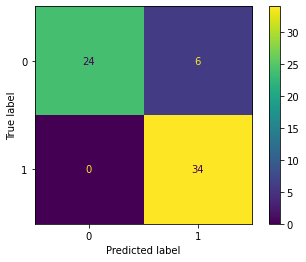



NAIVE BAYES CLASSIFIER
Accuracy: 0.906 	Precision: 0.920 	Recall: 0.906 	 F1 Score: 0.905


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


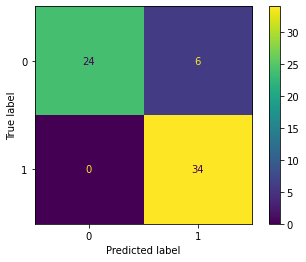



KNN CLASSIFIER
Accuracy: 0.906 	Precision: 0.920 	Recall: 0.906 	 F1 Score: 0.905


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


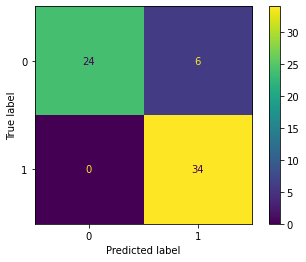



RANDOM FOREST CLASSIFIER
Accuracy: 0.906 	Precision: 0.920 	Recall: 0.906 	 F1 Score: 0.905


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


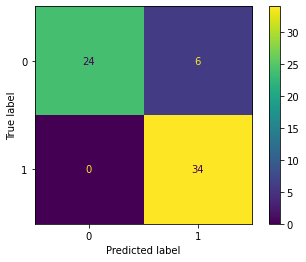



XG BOOST CLASSIFIER
Accuracy: 0.906 	Precision: 0.920 	Recall: 0.906 	 F1 Score: 0.905


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


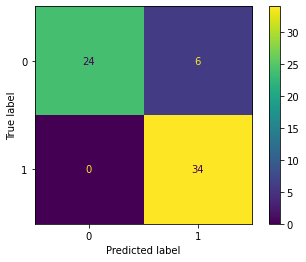



CAT BOOST CLASSIFIER
Accuracy: 0.906 	Precision: 0.920 	Recall: 0.906 	 F1 Score: 0.905


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


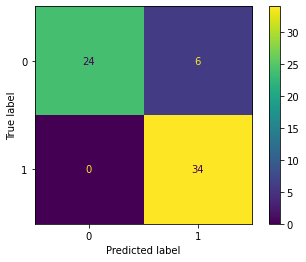

In [ ]:
clust(X_train).Kmeans(output='replace').classify_logreg()
clust(X_train).Kmeans(output='replace').classify_nb()
clust(X_train).Kmeans(output='replace').classify_knn()
clust(X_train).Kmeans(output='replace').classify_rf()
clust(X_train).Kmeans(output='replace').classify_xg()
clust(X_train).Kmeans(output='replace').classify_cat()

# ONLY CLASSIFICATIONS 



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


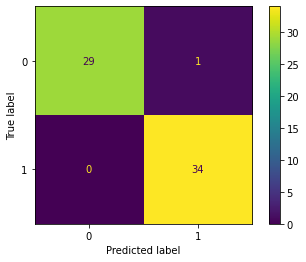



NAIVE BAYES CLASSIFIER
Accuracy: 0.969 	Precision: 0.970 	Recall: 0.969 	 F1 Score: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


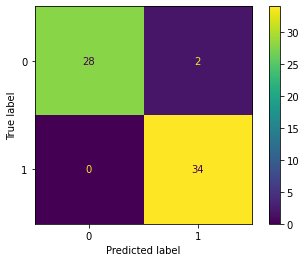



KNN CLASSIFIER


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


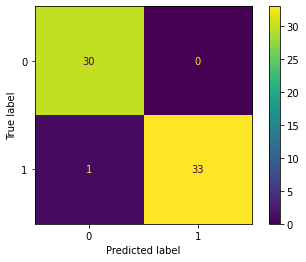



RANDOM FOREST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


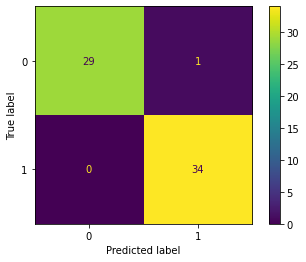



XG BOOST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


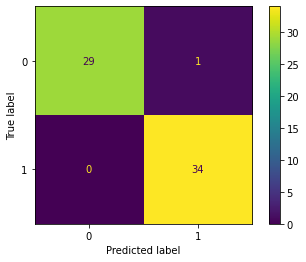



CAT BOOST CLASSIFIER
Accuracy: 1.000 	Precision: 1.000 	Recall: 1.000 	 F1 Score: 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


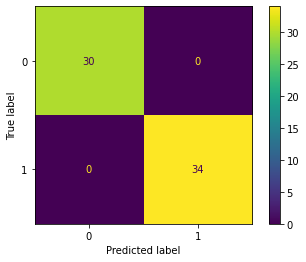

In [ ]:
clust(X_train).classify_logreg()
clust(X_train).classify_nb()
clust(X_train).classify_knn()
clust(X_train).classify_rf()
clust(X_train).classify_xg()
clust(X_train).classify_cat()

# KMEANS CLUSTERING AND THEN CLASSIFICATIONS WITH ADDING THE LABELS AS FEATURES

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


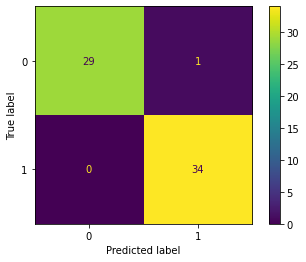

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



NAIVE BAYES CLASSIFIER
Accuracy: 0.969 	Precision: 0.970 	Recall: 0.969 	 F1 Score: 0.969


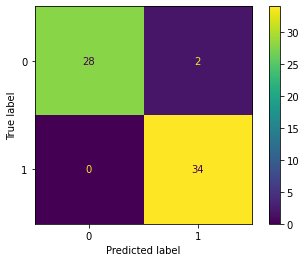

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



KNN CLASSIFIER
Accuracy: 1.000 	Precision: 1.000 	Recall: 1.000 	 F1 Score: 1.000


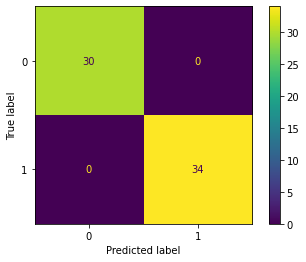

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



RANDOM FOREST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


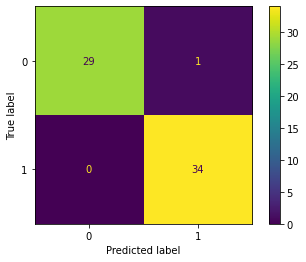



XG BOOST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


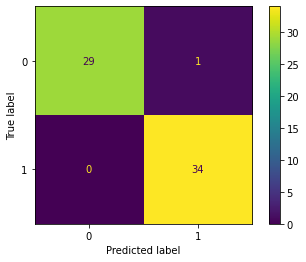



CAT BOOST CLASSIFIER
Accuracy: 1.000 	Precision: 1.000 	Recall: 1.000 	 F1 Score: 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


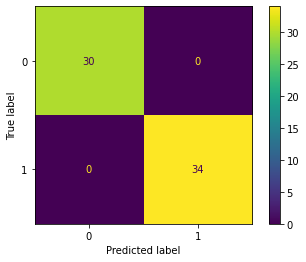

In [ ]:
clust(X_train).Kmeans(output='add').classify_logreg()
clust(X_train).Kmeans(output='add').classify_nb()
clust(X_train).Kmeans(output='add').classify_knn()
clust(X_train).Kmeans(output='add').classify_rf()
clust(X_train).Kmeans(output='add').classify_xg()
clust(X_train).Kmeans(output='add').classify_cat()

# EM CLUSTERING

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


class clust():
    def _load_data(self, sklearn_load_ds):
        data = sklearn_load_ds
        # X = pd.DataFrame(data.data)
        # X = data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(new_train, y_train, test_size=0.2, random_state=42)
        
        
    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    # Logistic Regression
    def classify_logreg(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nLOGISTIC REGRESSION CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Naive Bayes
    def classify_nb(self, model=GaussianNB()):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nNAIVE BAYES CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # KNN 
    def classify_knn(self, model=KNeighborsClassifier(n_neighbors=5)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nKNN CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Random Forest 
    def classify_rf(self, model=RandomForestClassifier(max_depth=2, random_state=0)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nRANDOM FOREST CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # XG Boost 
    def classify_xg(self, model=XGBClassifier()):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nXG BOOST CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Cat Boost
    def classify_cat(self, model=CatBoostClassifier(verbose=0, n_estimators=100)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nCAT BOOST CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()


    def EMClust(self, output='add'):
        # n_clusters = len(np.unique(self.y_train))
        clf = GaussianMixture(n_components=2)
        
        y_labels_train = clf.fit_predict(self.X_train)
        y_labels_test = clf.predict(self.X_test)

        # print(self.X_train['clust'])

        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self

# EM CLUSTERING AND THEN CLASSIFICATIONS WITHOUT ADDING THE LABELS AS FEATURES



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.891 	Precision: 0.909 	Recall: 0.891 	 F1 Score: 0.889


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


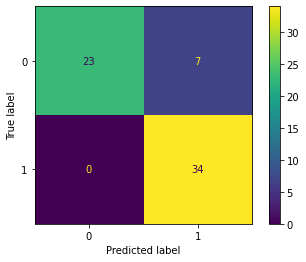



NAIVE BAYES CLASSIFIER
Accuracy: 0.891 	Precision: 0.909 	Recall: 0.891 	 F1 Score: 0.889


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


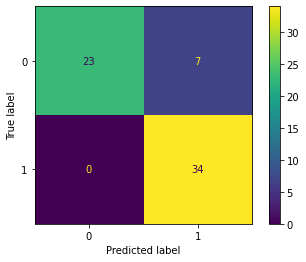



KNN CLASSIFIER
Accuracy: 0.891 	Precision: 0.909 	Recall: 0.891 	 F1 Score: 0.889


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


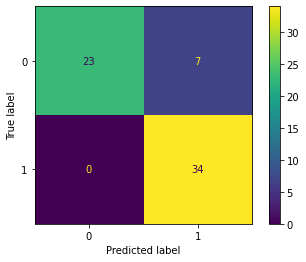



RANDOM FOREST CLASSIFIER
Accuracy: 0.891 	Precision: 0.909 	Recall: 0.891 	 F1 Score: 0.889


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


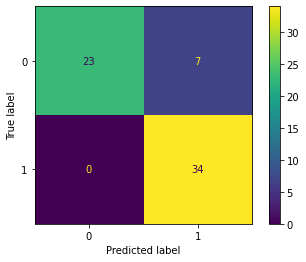



XG BOOST CLASSIFIER
Accuracy: 0.891 	Precision: 0.909 	Recall: 0.891 	 F1 Score: 0.889


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


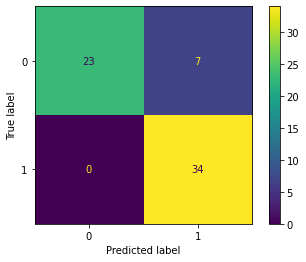



CAT BOOST CLASSIFIER
Accuracy: 0.891 	Precision: 0.909 	Recall: 0.891 	 F1 Score: 0.889


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


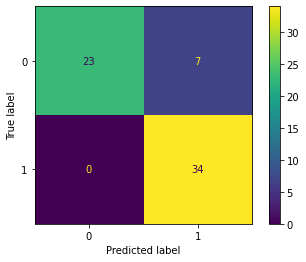

In [ ]:
clust(X_train).EMClust(output='replace').classify_logreg()
clust(X_train).EMClust(output='replace').classify_nb()
clust(X_train).EMClust(output='replace').classify_knn()
clust(X_train).EMClust(output='replace').classify_rf()
clust(X_train).EMClust(output='replace').classify_xg()
clust(X_train).EMClust(output='replace').classify_cat()

# Only Classification



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


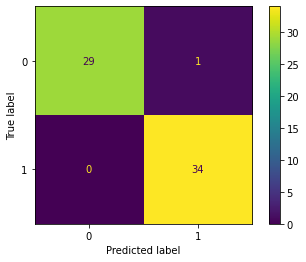



NAIVE BAYES CLASSIFIER
Accuracy: 0.969 	Precision: 0.970 	Recall: 0.969 	 F1 Score: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


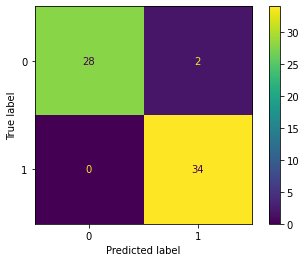



KNN CLASSIFIER


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


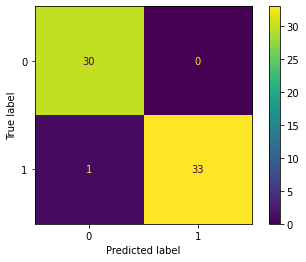



RANDOM FOREST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


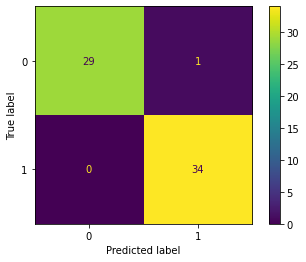



XG BOOST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


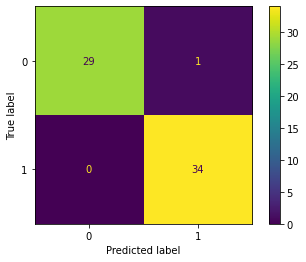



CAT BOOST CLASSIFIER
Accuracy: 1.000 	Precision: 1.000 	Recall: 1.000 	 F1 Score: 1.000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


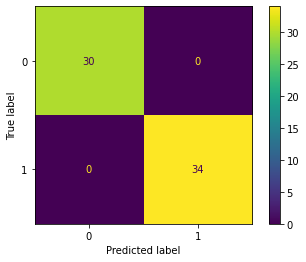

In [ ]:
clust(X_train).classify_logreg()
clust(X_train).classify_nb()
clust(X_train).classify_knn()
clust(X_train).classify_rf()
clust(X_train).classify_xg()
clust(X_train).classify_cat()

# EM CLUSTERING AND THEN CLASSIFICATIONS WITH ADDING THE LABELS AS FEATURES

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.969 	Precision: 0.969 	Recall: 0.969 	 F1 Score: 0.969


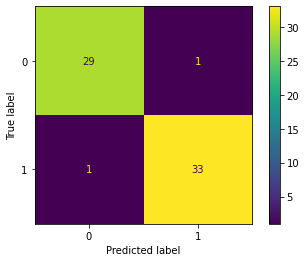

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



NAIVE BAYES CLASSIFIER
Accuracy: 0.969 	Precision: 0.970 	Recall: 0.969 	 F1 Score: 0.969


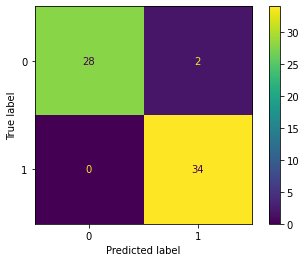

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



KNN CLASSIFIER
Accuracy: 1.000 	Precision: 1.000 	Recall: 1.000 	 F1 Score: 1.000


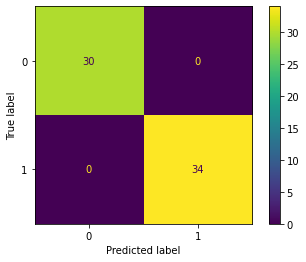

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,




RANDOM FOREST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


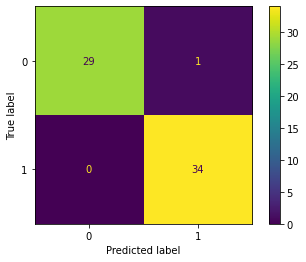



XG BOOST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


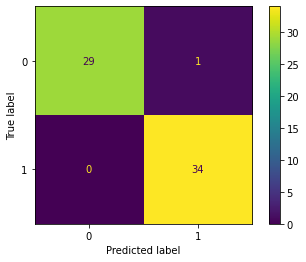



CAT BOOST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


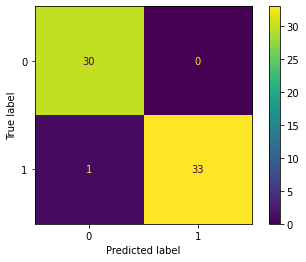

In [ ]:
clust(X_train).EMClust(output='add').classify_logreg()
clust(X_train).EMClust(output='add').classify_nb()
clust(X_train).EMClust(output='add').classify_knn()
clust(X_train).EMClust(output='add').classify_rf()
clust(X_train).EMClust(output='add').classify_xg()
clust(X_train).EMClust(output='add').classify_cat()

# DB SCAN

In [ ]:
!pip install catboost
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 10 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


class clust():
    def _load_data(self, sklearn_load_ds):
        data = sklearn_load_ds
        # X = pd.DataFrame(data.data)
        # X = data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(new_train, y_train, test_size=0.3, random_state=42)
        
        
    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    # Logistic Regression
    def classify_logreg(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nLOGISTIC REGRESSION CLASSIFIER")
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Naive Bayes
    def classify_nb(self, model=GaussianNB()):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nNAIVE BAYES CLASSIFIER")
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # KNN 
    def classify_knn(self, model=KNeighborsClassifier(n_neighbors=5)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nKNN CLASSIFIER")
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Random Forest 
    def classify_rf(self, model=RandomForestClassifier(max_depth=2, random_state=0)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nRANDOM FOREST CLASSIFIER")
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # XG Boost 
    def classify_xg(self, model=XGBClassifier()):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nXG BOOST CLASSIFIER")
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Cat Boost
    def classify_cat(self, model=CatBoostClassifier(verbose=0, n_estimators=100)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nCAT BOOST CLASSIFIER")
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()


    def Kmeans(self, output='add'):
        n_clusters = len(np.unique(self.y_train))
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(self.X_train)
        y_labels_train = clf.labels_
        y_labels_test = clf.predict(self.X_test)

        # print(self.X_train['clust'])

        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self

    def DBscan(self, output='add'):
        epsilon = 0.5
        minimumSamples = 5
        db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(self.X_train)
        y_labels_train = db.labels_
        
        # print(y_labels_train)

        epsilon = 0.5
        minimumSamples = 5
        db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(self.X_test)
        y_labels_test = db.labels_
        
        # print(y_labels_test)

        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self
      
    



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.4791666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


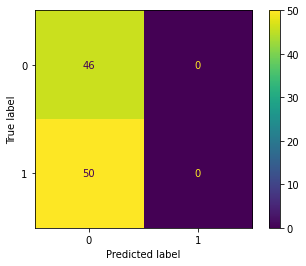



NAIVE BAYES CLASSIFIER
Accuracy: 0.4791666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


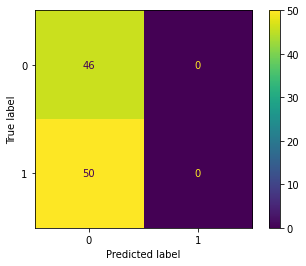



KNN CLASSIFIER
Accuracy: 0.5208333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


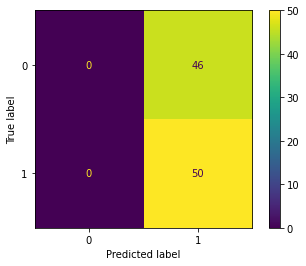



RANDOM FOREST CLASSIFIER
Accuracy: 0.4791666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


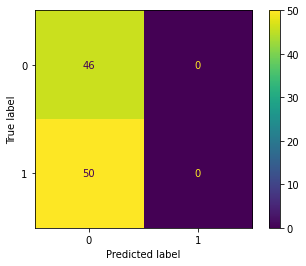



XG BOOST CLASSIFIER
Accuracy: 0.4791666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


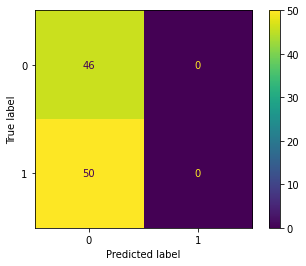



CAT BOOST CLASSIFIER
Accuracy: 0.4791666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


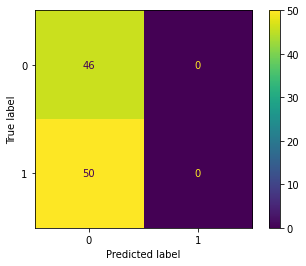

In [ ]:
clust(X_train).DBscan(output='replace').classify_logreg()
clust(X_train).DBscan(output='replace').classify_nb()
clust(X_train).DBscan(output='replace').classify_knn()
clust(X_train).DBscan(output='replace').classify_rf()
clust(X_train).DBscan(output='replace').classify_xg()
clust(X_train).DBscan(output='replace').classify_cat()